In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#import data
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


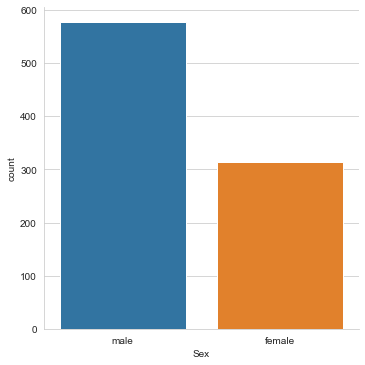

In [6]:
#Gender Plot
sns.factorplot('Sex',data=df,kind='count')

From the graph , we can see that male is the general sex 

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


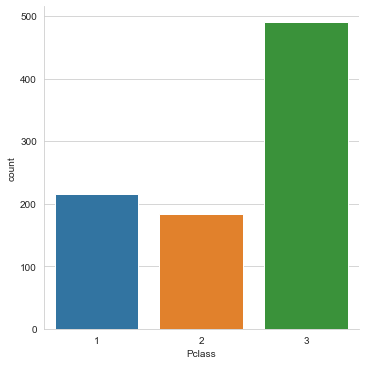

In [7]:
#Pclass Plot
sns.factorplot('Pclass',data=df,kind='count')

We have 3 classes , and we can see that more than 400 passengers are in the third classe

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


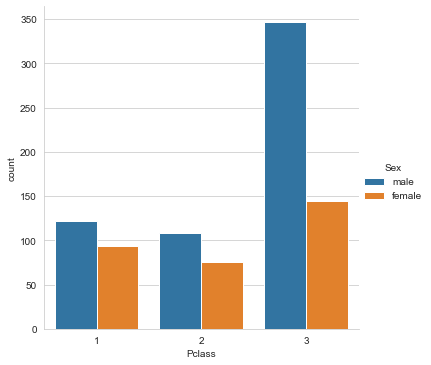

In [8]:
#Gender distribution among the classes
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

We have here the distribution of sex by classes (1,2 and 3)
- In all three classes we see that males are more than females , and males are very present in the third classe

This gives us an insight that there are quite a few males than females in 3rd classes , let's see now how many children are in 3rd classe

In [9]:
def titanic_children(passenger):
    age , sex = passenger
    if age<16:
        return 'Child'
    else:
        return sex
df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

Plotting a graph to check the ratio of male and children in each category of class

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


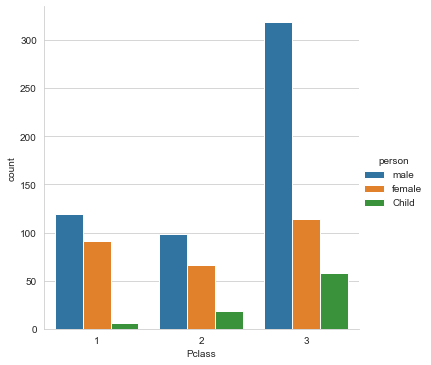

In [10]:
sns.factorplot('Pclass',data=df,hue='person',kind='count')

We have here another dimension of this data , that males , females and children
- We see that very few children and in the first classe and many more in the second and third classes

<AxesSubplot:>

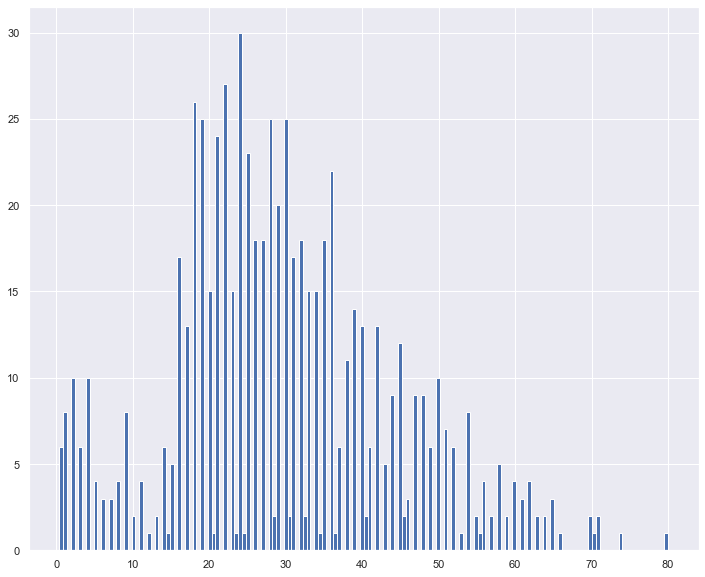

In [11]:
#Passenger ages
sns.set(rc={'figure.figsize':(12,10)})
df['Age'].hist(bins=160)

We have here the ages for all the people
- 80 years is the oldest passenger
- Youngest passenger is only few months old

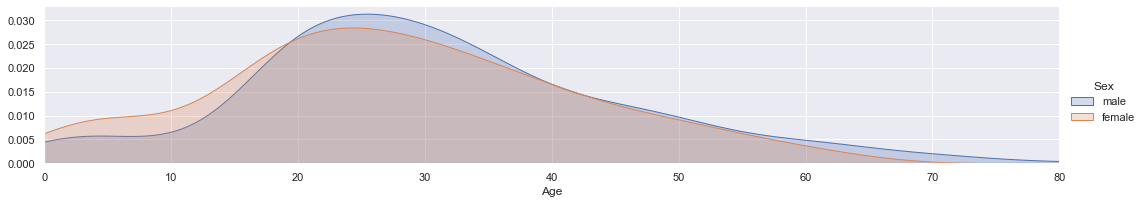

In [12]:
as_fig = sns.FacetGrid(df,hue='Sex',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest=df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

We have here data distribution of Age for each Sex (Male and Female)

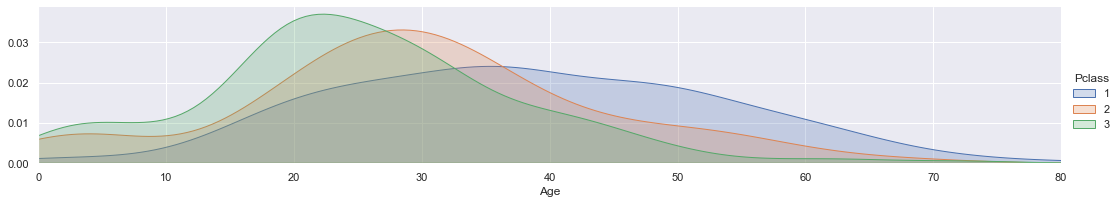

In [13]:
as_fig = sns.FacetGrid(df,hue='Pclass',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest=df['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

Here we have data distribution of Age in each classe (1 , 2 and 3)

In [14]:
#Mean age of the passengers
df['Age'].mean()

29.69911764705882

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Drop the Cabin column because there are many null values and it does not help in making prediction

In [17]:
df.drop('Cabin',axis=1,inplace=True)

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Filling the null values in the Embarked with S as there are more number of passengers 

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

Check if there are still missing values in the dataset

In [20]:
df.isnull().values.any()

False

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
person         0
dtype: int64

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


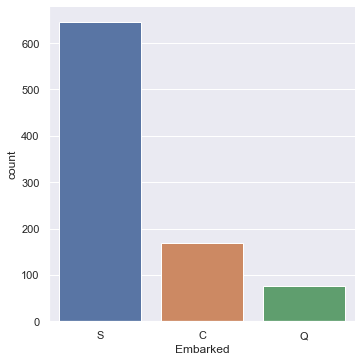

In [22]:
#Embarked Plot
sns.factorplot('Embarked',data=df,kind='count')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


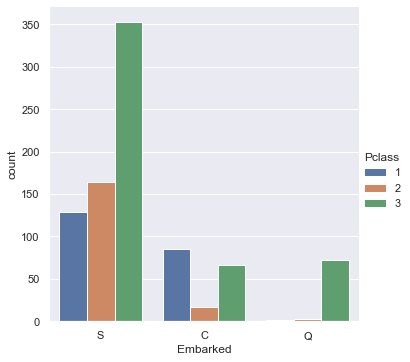

In [23]:
#Emabrked by classes
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')

It is interesting to see that most of the passengers boarded at Queenstown are from 3rd class

Let's check who are with family and who are alone , this can be found by adding Parch and Sibsp columns

In [24]:
df['Alone'] = df.Parch + df.SibSp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  person       891 non-null    object 
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


If alone value is >0 then they are with family else they are Alone

In [25]:
df['Alone'].loc[df['Alone'] > 0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Let's us visualise the Alone Column

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


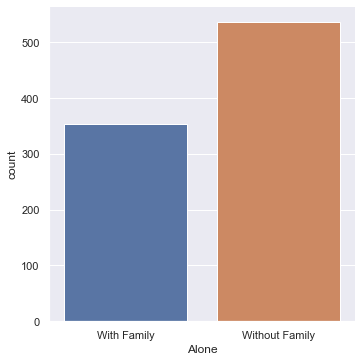

In [26]:
sns.factorplot('Alone',data=df,kind='count')

We can see that more than 500 passengers are without fammily 

Let's see who are alone according to each classe

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


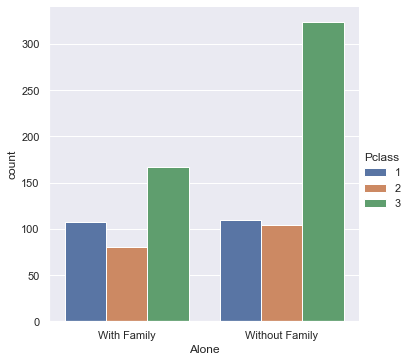

In [27]:
sns.factorplot('Alone',data=df,hue='Pclass',kind='count')

Let's see who is survived and who is perished

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


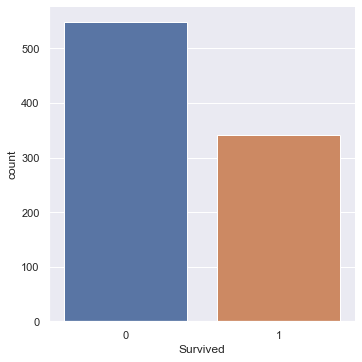

In [28]:
sns.factorplot('Survived',data=df,kind='count')

We can see that more than 500 passengers are not survived , and few people are survived

Let's check of the class had any effect in the survival rate

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


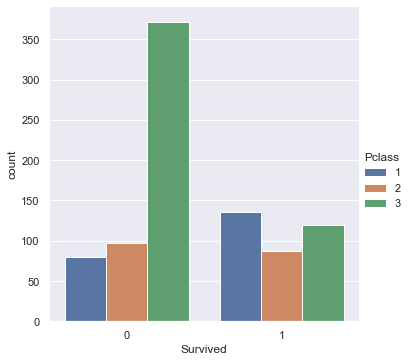

In [29]:
sns.factorplot('Survived',data=df,hue='Pclass',kind='count')

We have here kind of survived in each of the class

Correlation between features

Text(0.5, 1.0, 'Correlation between features')

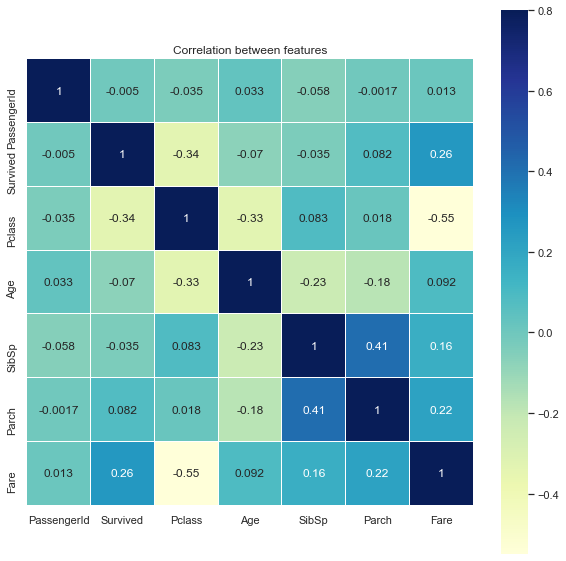

In [30]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

In [31]:
person_dummies = pd.get_dummies(df['person'])
alone_dummies = pd.get_dummies(df['Alone'])
embarked_dummies = pd.get_dummies(df['Embarked'])
embarked_dummies.drop('Q',axis=1,inplace=True)

In [32]:
pclass_dummies = pd.get_dummies(df['Pclass'])
pclass_dummies.columns=['class_1','class_2','class_3']

In [33]:
import math
df['Age'] = df['Age'].apply(math.ceil)
df['Fare'] = df['Fare'].apply(math.ceil)

In [34]:
df = pd.concat([df,pclass_dummies,person_dummies,alone_dummies,embarked_dummies],axis=1)

In [38]:
df.head()

,Survived,Pclass,Age,Fare,person,Alone,class_1,class_2,class_3,Child,female,male,With Family,Without Family,C,S
0,0,3,22,8,male,With Family,0,0,1,0,0,1,1,0,0,1
1,1,1,38,72,female,With Family,1,0,0,0,1,0,1,0,1,0
2,1,3,26,8,female,Without Family,0,0,1,0,1,0,0,1,0,1
3,1,1,35,54,female,With Family,1,0,0,0,1,0,1,0,0,1
4,0,3,35,9,male,Without Family,0,0,1,0,0,1,0,1,0,1


In [43]:
titanic_train = df.drop('Survived',axis=1)
titanic_survived = df.Survived

In [44]:
x_train , x_test , y_train , y_test = train_test_split(titanic_train,titanic_survived,test_size=0.2)

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
train_survival = logistic_model.predict(x_test)